In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')



In [3]:
df = pd.read_csv('marketing_data.csv')

In [4]:
mkt = df.copy()
mkt.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
mkt = mkt.rename(columns={' Income ':'Income', 'Dt_Customer':'Year_Joined'}).drop('ID', axis=1)
mkt['Income'] = mkt['Income'].str.replace('\$|,', '', regex = True)
mkt['Income'] = mkt['Income'].astype(float)

mkt['Year_Joined'] = pd.DatetimeIndex(mkt['Year_Joined']).year.astype(int)

mkt['ChildrenHome'] = np.where(mkt['Kidhome'] > 0, 1, np.where(mkt['Teenhome'] > 0,1,0))

mkt['MntTotal'] = mkt['MntWines'] + mkt['MntFishProducts'] + mkt['MntFruits'] + mkt['MntGoldProds'] + mkt['MntMeatProducts'] + mkt['MntSweetProducts']
mkt['NumPurchasesTotal'] = mkt['NumCatalogPurchases'] + mkt['NumDealsPurchases'] + mkt['NumStorePurchases'] + mkt['NumWebPurchases']
mkt['AcceptedCmpTotal'] = mkt['AcceptedCmp1'] + mkt['AcceptedCmp2'] + mkt['AcceptedCmp3'] + mkt['AcceptedCmp4'] + mkt['AcceptedCmp5']

# Encoding Categoricals

# Collapse countries into binary 'SP or not'
mkt['Country_SP'] = np.where(mkt['Country'] == 'SP', 1, 0)

# Ordinal/Label Encoding, retain
mkt['Education'] = mkt['Education'].replace('2n Cycle', 'Master')
mkt['Education_Enc'] = mkt['Education'].replace(['Basic', 'Graduation', 'Master', 'PhD'], [0,1,2,3])

# One-hot encoding, drop first
mkt['Marital_Status'] = mkt['Marital_Status'].replace(['YOLO', 'Absurd', 'Alone', 'Widow'], ['Single']*3 + ['Divorced'])
mkt = mkt.join(pd.get_dummies(mkt.Marital_Status, drop_first=True, columns=['Divorced', 'Single', 'Together','Married'],prefix='Marital'))



totals = ['AcceptedCmpTotal', 'MntTotal', 'NumPurchasesTotal']
exclude = ['Kidhome', 'Teenhome', 'Country', 'Education', 'Marital_Status']
cats = ['Country', 'Education', 'Marital_Status', ]
newfeats = ['ChildrenHome', 'Country_SP', 'Education_Enc', 'Marital_Married', 'Marital_Single', 'Marital_Together']

In [6]:
cols = ['Response',  'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpTotal',
        'Year_Joined', 'Recency', 'Complain','NumWebVisitsMonth',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntWines', 'MntFruits', 'MntTotal',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumPurchasesTotal',
        'Year_Birth', 'Income',
        'Kidhome', 'Teenhome', 'ChildrenHome',
        'Country', 'Country_SP',
        'Education', 'Education_Enc',
        'Marital_Status', 'Marital_Married', 'Marital_Single', 'Marital_Together']

mkt = mkt[cols]
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
Response               2240 non-null int64
AcceptedCmp1           2240 non-null int64
AcceptedCmp2           2240 non-null int64
AcceptedCmp3           2240 non-null int64
AcceptedCmp4           2240 non-null int64
AcceptedCmp5           2240 non-null int64
AcceptedCmpTotal       2240 non-null int64
Year_Joined            2240 non-null int64
Recency                2240 non-null int64
Complain               2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntTotal               2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-n

In [7]:
mkt['MntTotal'].sum()

1356988

In [8]:
mkt.head()

,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpTotal,Year_Joined,Recency,Complain,...,Teenhome,ChildrenHome,Country,Country_SP,Education,Education_Enc,Marital_Status,Marital_Married,Marital_Single,Marital_Together
0,1,0,0,0,0,0,0,2014,0,0,...,0,0,SP,1,Graduation,1,Divorced,0,0,0
1,1,0,1,0,0,0,1,2014,0,0,...,0,0,CA,0,Graduation,1,Single,0,1,0
2,0,0,0,0,0,0,0,2014,0,0,...,1,1,US,0,Graduation,1,Married,1,0,0
3,0,0,0,0,0,0,0,2014,0,0,...,1,1,AUS,0,Graduation,1,Together,0,0,1
4,1,0,0,1,0,0,1,2014,0,0,...,0,1,SP,1,Graduation,1,Single,0,1,0


In [9]:
#check for missing values
mkt[mkt.isna().any(axis=1)]

,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpTotal,Year_Joined,Recency,Complain,...,Teenhome,ChildrenHome,Country,Country_SP,Education,Education_Enc,Marital_Status,Marital_Married,Marital_Single,Marital_Together
134,0,0,0,0,0,0,0,2012,4,0,...,1,1,GER,0,PhD,3,Married,1,0,0
262,0,0,0,0,0,0,0,2013,11,0,...,0,1,US,0,Graduation,1,Married,1,0,0
394,0,0,0,0,0,0,0,2014,17,0,...,0,1,AUS,0,PhD,3,Together,0,0,1
449,0,0,0,0,0,0,0,2013,19,0,...,0,1,AUS,0,Graduation,1,Single,0,1,0
525,0,0,0,0,0,0,0,2013,23,0,...,1,1,CA,0,PhD,3,Married,1,0,0
590,0,0,0,0,0,0,0,2012,25,0,...,0,1,GER,0,Master,2,Married,1,0,0
899,0,0,0,0,0,0,0,2013,39,0,...,1,1,US,0,Master,2,Together,0,0,1
997,0,0,0,0,0,0,0,2014,45,0,...,1,1,GER,0,Graduation,1,Single,0,1,0
1096,0,0,0,0,0,0,0,2014,49,0,...,1,1,AUS,0,Master,2,Single,0,1,0
1185,0,0,0,0,0,0,0,2013,52,0,...,1,1,AUS,0,Master,2,Together,0,0,1


Income is typically an important metric in marketing analysis, so I want to carefully consider how to handle these missing values

The distribution is as expected, skewed right with an outlier on the high end. The Median would certainly be favorable over Mean for imputation.
However, Income has a fairly high correlation with several variables, so I will consider regression imputation.

In [10]:
#correlations with income sorted by abs value
IncomeCorr = mkt.corrwith(mkt["Income"])
temp = IncomeCorr.abs().sort_values(ascending=False)
IncomeCorr = IncomeCorr.reindex(index=temp.index)
IncomeCorr

Income                 1.000000
MntTotal               0.667576
NumCatalogPurchases    0.589162
MntMeatProducts        0.584633
MntWines               0.578650
NumPurchasesTotal      0.566873
NumWebVisitsMonth     -0.553088
NumStorePurchases      0.529362
MntSweetProducts       0.440744
MntFishProducts        0.438871
MntFruits              0.430842
Kidhome               -0.428669
NumWebPurchases        0.387878
ChildrenHome          -0.338153
AcceptedCmp5           0.335943
MntGoldProds           0.325916
AcceptedCmpTotal       0.308381
AcceptedCmp1           0.276820
AcceptedCmp4           0.184400
Year_Birth            -0.161791
Response               0.133047
Education_Enc          0.102378
AcceptedCmp2           0.087545
NumDealsPurchases     -0.083101
Complain              -0.027225
Country_SP            -0.026761
Marital_Single        -0.025390
Marital_Together       0.023425
Year_Joined            0.022451
Teenhome               0.019133
Marital_Married       -0.016479
Accepted

In [11]:
 # To remove all statistical outliers

#cols = ['Income']

#Q1 = mkt[cols].quantile(0.25)
#Q3 = mkt[cols].quantile(0.75)
#IQR = Q3 - Q1

#mkt_no_out = mkt[~((mkt[cols] < (Q1 - 1.5 * IQR)) |(mkt[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

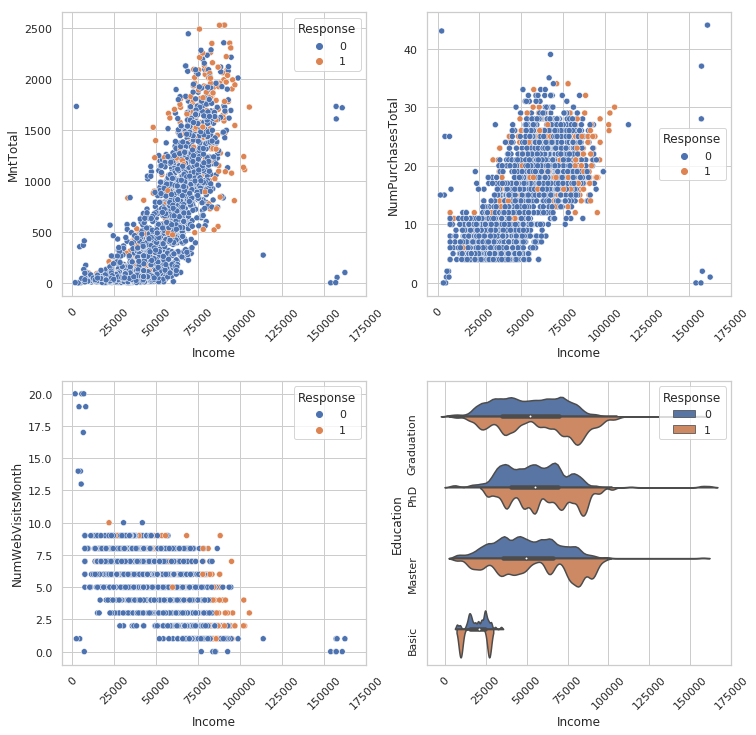

In [22]:
mkt_no_out = mkt[mkt.Income < mkt['Income'].max()]

fig, ax = plt.subplots(2,2,figsize=(12,12))
ax = ax.flatten()

sns.scatterplot(data=mkt_no_out, x='Income', y= 'MntTotal', hue = 'Response', ax = ax[0])

sns.scatterplot(data=mkt_no_out, x='Income', y= 'NumPurchasesTotal', hue = 'Response', ax = ax[1])

sns.scatterplot(data=mkt_no_out, x='Income', y= 'NumWebVisitsMonth', hue = 'Response', ax = ax[2])


sns.violinplot(orient='h', data=mkt_no_out, x = 'Income', y = 'Education', hue = 'Response', split = True, bw= 0.1, ax = ax[3])
plt.sca(ax[3])
plt.yticks(rotation = 90)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(ticks=list(range(0, 200000, 25000)),rotation=45)
    plt.subplots_adjust(hspace=0.3)

plt.savefig('.//images//IncomeCorrelations.png')

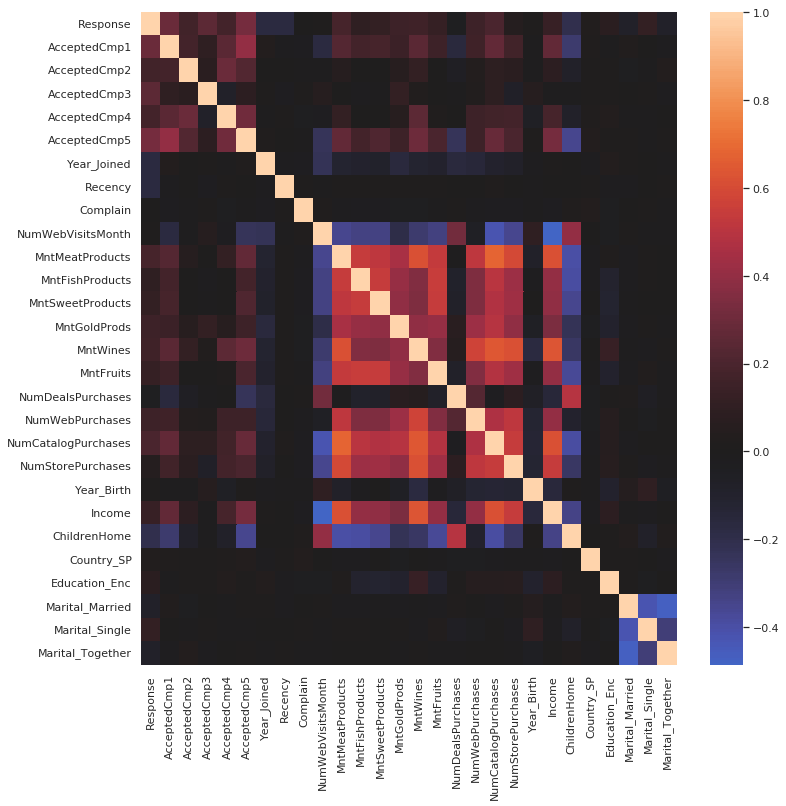

In [28]:
mkt_nonan = mkt_no_out[mkt_no_out['Income'].notna()]
mkt_nonan.drop(cats + ['MntTotal', 'NumPurchasesTotal', 'AcceptedCmpTotal', 'Kidhome', 'Teenhome'], axis=1, inplace=True)
corrs = mkt_nonan.corr(method = 'kendall')

# plot clustered heatmap of correlations
plt.figure(figsize=(12,12))
sns.heatmap(corrs, center = 0)

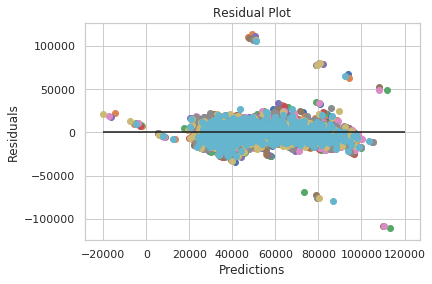

 Mean training R-squared over 10 folds: 0.762150629612488
 Mean testing R-squared over 10 folds: 0.750279788007093


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

mkt_nans = mkt[mkt['Income'].isna()].drop(['Income', 'MntTotal', 'NumPurchasesTotal', 'AcceptedCmpTotal', 'Kidhome', 'Teenhome'] + cats, axis = 1)

X = mkt_nonan.drop(['Income'], axis = 1)
y = mkt_nonan['Income']

train_scores = []
test_scores = []
imputations = pd.DataFrame(index=mkt_nans.index)
folds = 10

for i in range(folds):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    clf = LinearRegression()
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    pred = clf.predict(mkt_nans)


    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))
    imputations[str(i)] = pred

    residual = y_test-y_test_pred
    plt.scatter(y_test_pred, residual)

    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')




plt.hlines(y=0,xmin=-20000, xmax=120000)
plt.show()


print(f' Mean training R-squared over {folds} folds: {np.mean(train_scores)}')
print(f' Mean testing R-squared over {folds} folds: {np.mean(test_scores)}')


In [30]:
imputations['Income'] = np.mean(imputations, axis = 1)

mkt.loc[imputations.index,'Income'] = imputations.Income

print(f'Mean Income predictions imputed: \n{imputations.Income}')

Mean Income predictions imputed: 
134     46226.859144
262     30425.719716
394     35953.160627
449     80648.311289
525     51725.765651
590     32197.867008
899     49555.622744
997     33528.710484
1096    34243.174462
1185    63533.213076
1213    80162.705941
1312    34689.870852
1515    58350.302766
1558    80555.601387
1693    88705.104224
1804    50412.849934
1858    38497.024952
1863    30554.131347
1880    43997.041333
1967    67127.299755
1983    38149.401994
2139    43385.844078
2165    40801.419939
2170    62405.091910
Name: Income, dtype: float64


With the missing values handled lets continue with other exploration

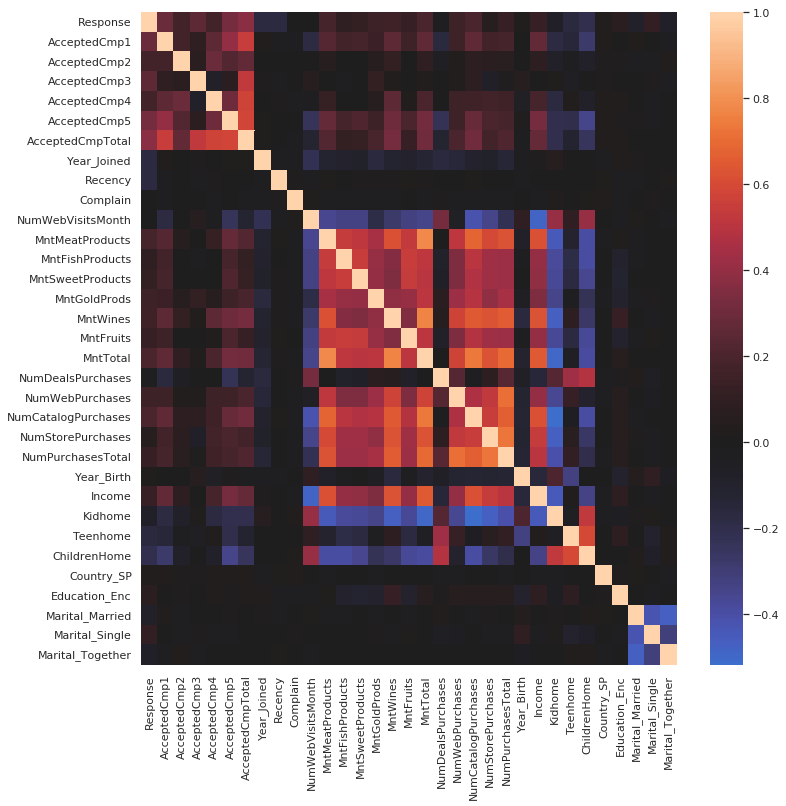

In [33]:
corrs = mkt.drop(columns= cats).corr(method = 'kendall')

plt.figure(figsize=(12,12))
sns.heatmap(corrs, center = 0)

In [34]:
corrs = mkt.corrwith(mkt["Response"])
temp = corrs.abs().sort_values(ascending=False)
corrs = corrs.reindex(index=temp.index)
corrs

Response               1.000000
AcceptedCmpTotal       0.426035
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
MntTotal               0.265298
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
ChildrenHome          -0.205134
Recency               -0.198437
AcceptedCmp4           0.177019
Year_Joined           -0.171030
AcceptedCmp2           0.169293
NumPurchasesTotal      0.155138
Teenhome              -0.154446
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.134507
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
Marital_Single         0.110555
Education_Enc          0.084625
Kidhome               -0.080008
Marital_Married       -0.079378
Marital_Together      -0.075770
NumStorePurchases      0.039363
Country_SP             0.031912
Year_Birth             0.021325
NumWebVisitsMonth     -0.003987
NumDeals

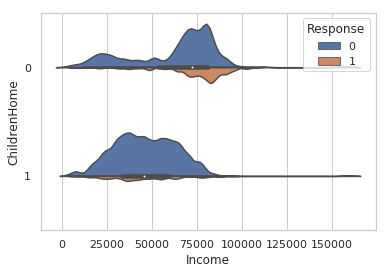

In [41]:
mkt_no_out = mkt[mkt.Income < mkt['Income'].max()]

sns.violinplot(orient='h', x = mkt_no_out['Income'], y = mkt_no_out['ChildrenHome'], hue = mkt_no_out['Response'], split = True, bw= 0.1, scale = 'count')



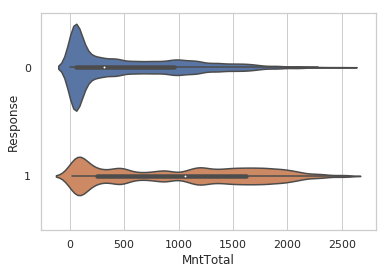

In [43]:
sns.violinplot(orient='h', x = mkt_no_out['MntTotal'], y = mkt_no_out['Response'], split = True, bw= 0.1)

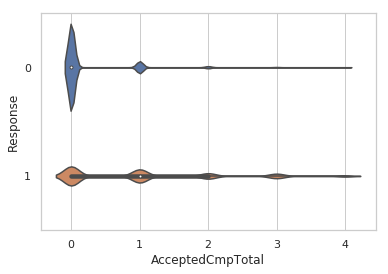

In [44]:
sns.violinplot(orient='h', x = mkt_no_out['AcceptedCmpTotal'], y = mkt_no_out['Response'], split = True, bw= 0.1)

### Education

In [81]:
edu = ['Basic', 'Graduation', 'Master', 'PhD']

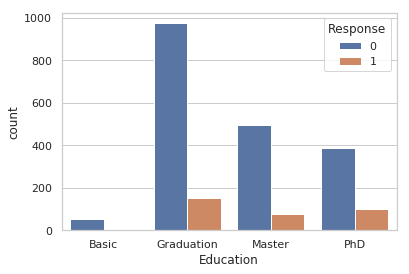

In [51]:
sns.countplot(order=edu, data=mkt_no_out, x='Education', hue='Response')

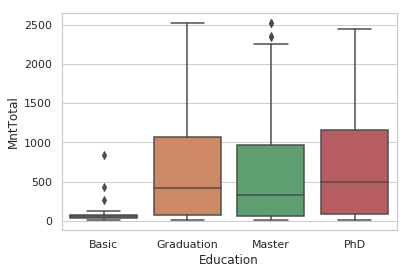

In [82]:
sns.boxplot(order=edu, orient='v', data = mkt_no_out, y = 'MntTotal', x = 'Education')

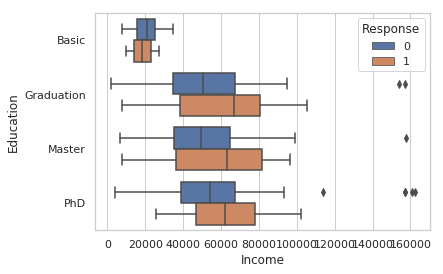

In [90]:
sns.boxplot(order=edu, orient='h', data = mkt_no_out, x = 'Income', y = 'Education', hue = 'Response')
#sns.violinplot(order=edu, orient='h', data = mkt_no_out, x = 'Income', y = 'Education', hue = 'Response')

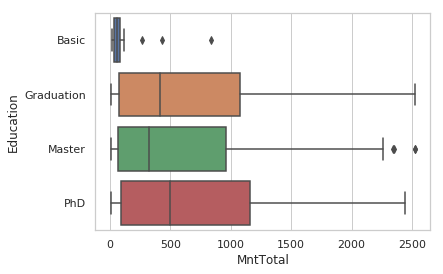

In [92]:
sns.boxplot(order=edu, orient='h', data = mkt_no_out, x = 'MntTotal', y = 'Education')

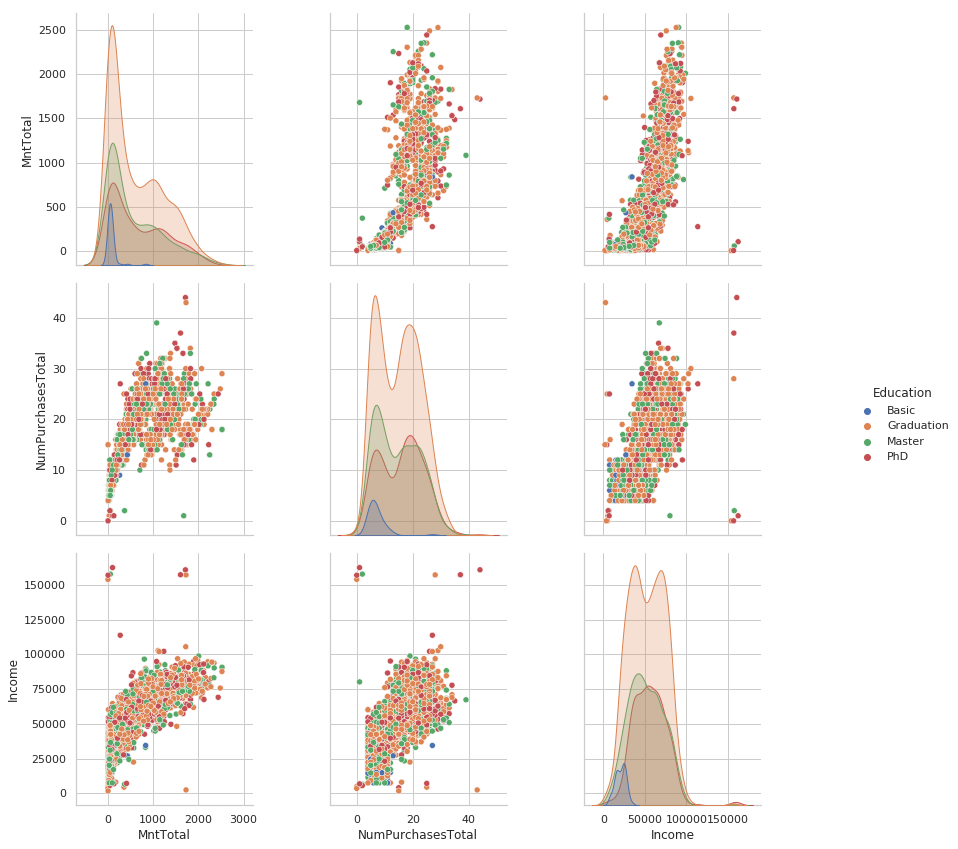

In [104]:
g = sns.pairplot(mkt_no_out[['Education', 'MntTotal', 'NumPurchasesTotal', 'Income']], hue = 'Education', height=4, hue_order=edu)
g

In [57]:
mkt_no_out.head()

,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpTotal,Year_Joined,Recency,Complain,...,Teenhome,ChildrenHome,Country,Country_SP,Education,Education_Enc,Marital_Status,Marital_Married,Marital_Single,Marital_Together
0,1,0,0,0,0,0,0,2014,0,0,...,0,0,SP,1,Graduation,1,Divorced,0,0,0
1,1,0,1,0,0,0,1,2014,0,0,...,0,0,CA,0,Graduation,1,Single,0,1,0
2,0,0,0,0,0,0,0,2014,0,0,...,1,1,US,0,Graduation,1,Married,1,0,0
3,0,0,0,0,0,0,0,2014,0,0,...,1,1,AUS,0,Graduation,1,Together,0,0,1
4,1,0,0,1,0,0,1,2014,0,0,...,0,1,SP,1,Graduation,1,Single,0,1,0


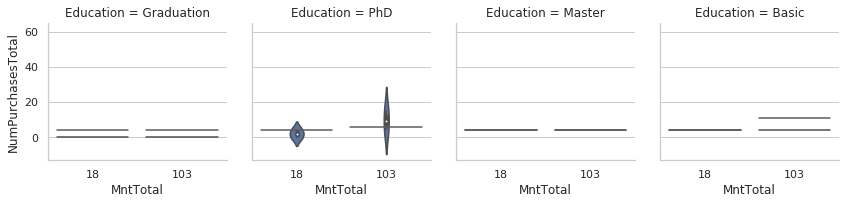

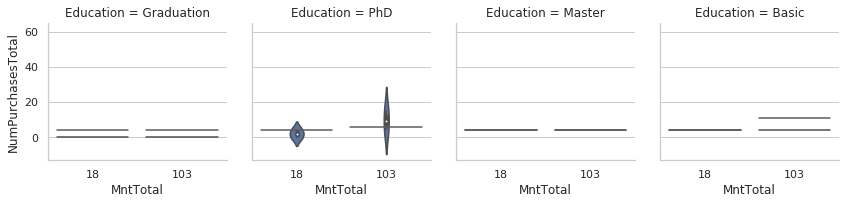

In [70]:
g = sns.FacetGrid(mkt_no_out[['Education', 'MntTotal', 'NumPurchasesTotal', 'Income', 'Response']], hue='Response', col='Education')
g.map(sns.violinplot, 'MntTotal', 'NumPurchasesTotal', split=True)

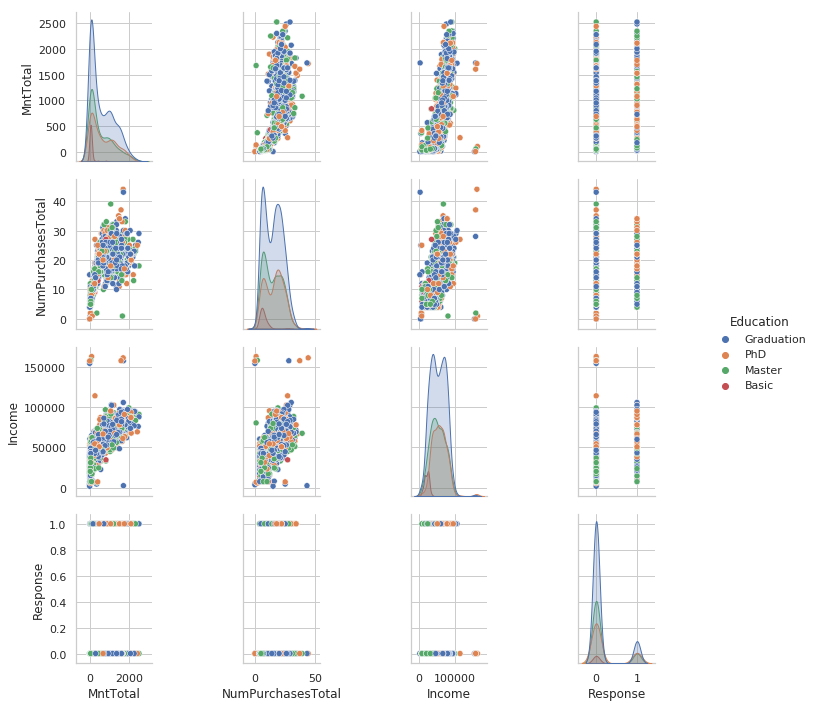

In [73]:
sns.pairplot(mkt_no_out[['Education', 'MntTotal', 'NumPurchasesTotal', 'Income', 'Response']], hue='Education')

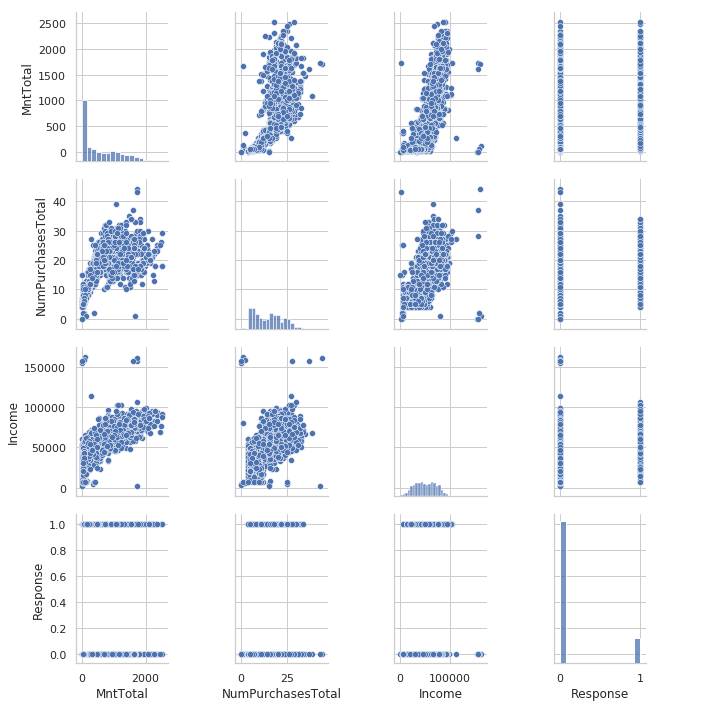

In [105]:
sns.pairplot(mkt_no_out[['MntTotal', 'NumPurchasesTotal', 'Income', 'Response']], diag_kind='hist')

Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


In [145]:

def RFC(df = mkt, n_estimators = 100, max_depth = None, min_samples_split = 2, min_samples_leaf = 1):
    X = df.drop(['Response'] + cats, axis = 1)
    y = df['Response']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    clf=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)

    preds = clf.predict(X_test)
    feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

    print('Training accuracy score: {0:0.4f}'.format(clf.score(X_train, y_train)))
    print('Testing accuracy score: {0:0.4f}'.format(clf.score(X_test, y_test)))
    print(f'Top 5 features: \n{feature_scores[0:5].round(4)}')
    return clf, preds, feature_scores

In [146]:
baseline, baseline_preds, baseline_feats = RFC(mkt)

Training accuracy score: 0.9962
Testing accuracy score: 0.8810
Top 5 features: 
Recency             0.0911
Income              0.0762
AcceptedCmpTotal    0.0670
MntTotal            0.0633
MntWines            0.0609
dtype: float64


In [ ]:
from sklearn.model_selection import validation_curve

X = mkt.drop(['Response'] + cats, axis = 1)
y = mkt['Response']


n_estimator visual tuning

In [222]:
def val_curves(X, y, param_names, param_range):

    for param, rnge in zip(param_names, list(param_range)):

        train_scoreNum, test_scoreNum = np.mean(
                                        validation_curve(
                                        RandomForestClassifier(n_estimators=30),
                                        X = X, y = y,
                                        param_name = param,
                                        param_range = rnge,
                                        cv = 5),
                                        axis=2)


        plt.plot(rnge, train_scoreNum, label = 'Training Accuracy')

        plt.plot(rnge, test_scoreNum, label = 'Testing Accuracy')
        ax = plt.gca()
        bests=[]

        for i in np.argsort(test_scoreNum)[-5:]:
            ax.plot(rnge[i], test_scoreNum[i], 'gx')
            bests.append((rnge[i], train_scoreNum[i].round(3), test_scoreNum[i].round(3)))

        print(f'Best 5 \'{param}\' values and train/test accuracy score: {bests}')
        plt.xlabel(f'{param}')
        plt.ylabel('Accuracy')
        plt.title(f'Random Forest Validation Curve for {param} - cv = 5')
        plt.legend()
        plt.show()



Best 5 'n_estimators' values and train/test accuracy score: [(55, 0.995, 0.717), (70, 0.995, 0.718), (75, 0.995, 0.719), (90, 0.995, 0.721), (50, 0.995, 0.722)]


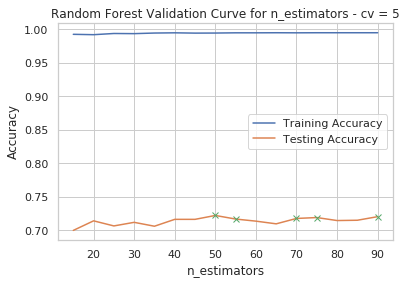

Best 5 'max_depth' values and train/test accuracy score: [(20, 0.994, 0.714), (25, 0.994, 0.715), (40, 0.994, 0.715), (30, 0.993, 0.72), (5, 0.906, 0.789)]


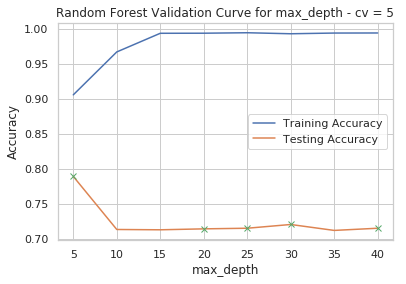

Best 5 'min_samples_split' values and train/test accuracy score: [(14, 0.95, 0.712), (2, 0.994, 0.718), (6, 0.981, 0.719), (26, 0.924, 0.72), (22, 0.93, 0.723)]


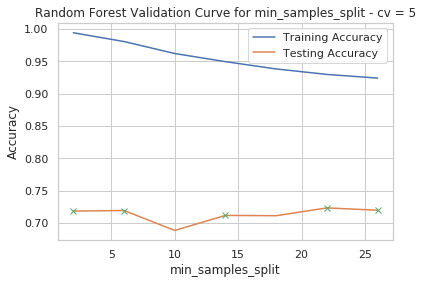

Best 5 'min_samples_leaf' values and train/test accuracy score: [(9, 0.909, 0.72), (8, 0.914, 0.721), (5, 0.933, 0.722), (7, 0.919, 0.723), (6, 0.926, 0.724)]


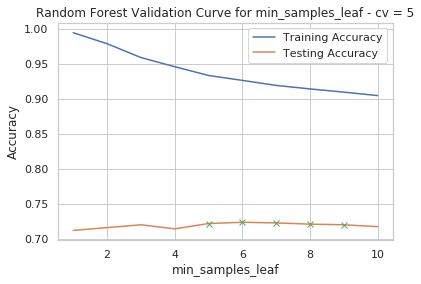

In [223]:
X = mkt.drop(['Response'] + cats, axis = 1)
y = mkt['Response']
param_names = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']
param_range = [range(15,95,5), range(5,45,5), range(2,30,4), range(1,11,1)]

val_curves(X,y,param_names,param_range)